In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [13]:
data = pd.read_csv("anime-dataset-2023.csv", encoding="utf8")
data.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,1-Sep-01,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...


# Clean Data

In [14]:
data = data.dropna(subset=['Genres'])
data = data.dropna(subset=['Source'])
data = data.dropna(subset=['Studios'])
data = data.dropna(subset=['Score'])
data.isnull().sum()

data = data[data['Genres'] != 'UNKNOWN']
data = data[data['Source'] != 'UNKNOWN']
data = data[data['Studios'] != 'UNKNOWN']
data = data[data['Score'] != 'UNKNOWN']

In [15]:
data.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,1-Sep-01,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [17]:
scaler = MinMaxScaler()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = data[['Score','Genres','Studios']].copy()

df_with_id = data[['anime_id','Name','Score','Genres','Studios']].copy()

df['Score'] = scaler.fit_transform(df[['Score']])
df['Genres'] = df['Genres'].str.split(', ')
df = df.explode('Genres')

df_with_id['Score'] = scaler.fit_transform(df_with_id[['Score']])
df_with_id['Genres'] = df_with_id['Genres'].str.split(', ')
df_with_id = df_with_id.explode('Genres')


df['Genres'] = le.fit_transform(df['Genres'])
df['Studios'] = le.fit_transform(df['Studios'])

df_with_id['Genres'] = le.fit_transform(df_with_id['Genres'])
df_with_id['Studios'] = le.fit_transform(df_with_id['Studios'])

# df = pd.get_dummies(df, columns=["genres", "studios"])

df['Score'].describe()



count    25587.000000
mean         0.672703
std          0.113606
min          0.000000
25%          0.597241
50%          0.674483
75%          0.750345
max          1.000000
Name: Score, dtype: float64

In [18]:
print(len(df))
print(len(df_with_id))

25587
25587


In [19]:
df.isnull().count()
# df.head()

Score      25587
Genres     25587
Studios    25587
dtype: int64

In [20]:
df

,Score,Genres,Studios
0,0.951724,0,1063
0,0.951724,3,1063
0,0.951724,16,1063
1,0.900690,0,158
1,0.900690,16,158
...,...,...,...
24579,0.550345,5,6
24579,0.550345,9,6
24590,0.571034,0,379
24590,0.571034,5,379


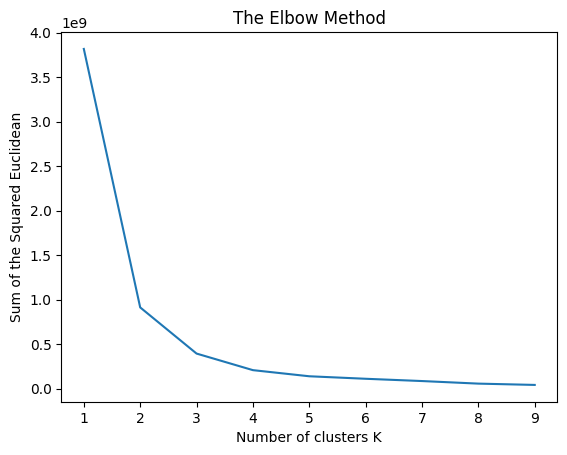

In [21]:
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(df)
  sse.append(km.inertia_)

plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

In [22]:
model = KMeans(n_clusters=3)
model.fit(df)

KMeans(n_clusters=3)

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)

0.6028583406034664

In [26]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(df, model.labels_)
print(dbs)

0.4964807943608686


In [27]:
df_with_id.head()


,anime_id,Name,Score,Genres,Studios
0,1,Cowboy Bebop,0.951724,0,1063
0,1,Cowboy Bebop,0.951724,3,1063
0,1,Cowboy Bebop,0.951724,16,1063
1,5,Cowboy Bebop: Tengoku no Tobira,0.900690,0,158
1,5,Cowboy Bebop: Tengoku no Tobira,0.900690,16,158


# Find where new point is locate in which cluster and find distance between points from chosen point

## Convert input to encode data

In [29]:
anime_name = str(input("What's the aniname >"))
if anime_name in df_with_id['Name'].values:
    row = df_with_id[df_with_id['Name'] == anime_name].copy().drop_duplicates(subset='anime_id')


row

,anime_id,Name,Score,Genres,Studios
15580,39572,Wangu Xian Qiong III: Eren Gu Pian,0.598621,1,51


In [30]:
encoded = row[['Score','Genres','Studios']].values
print(encoded)

[[ 0.59862069  1.         51.        ]]


In [32]:
from scipy.spatial.distance import cdist
# new_point = np.array([[row[['score','genres','studios']].values]])
nearest_cluster  = model.predict(encoded)

# current data is from 696
cluster_recommended_data = df[model.labels_ == nearest_cluster]

top5 = []

for index, row in cluster_recommended_data.iterrows():
    cluster_point = np.array([[row['Score'], row['Genres'], row['Studios']]])
    distance = cdist(encoded, cluster_point)
    
    # Add the index and distance to top5 list
    top5.append((index, distance[0][0]))

# Sort the top5 list based on distance
top5.sort(key=lambda x: x[1])

# Keep only the top 5 unique distances and remove duplicates
unique_distances = set()
filtered_top5 = []
for idx, dist in top5:
    if dist not in unique_distances:
        filtered_top5.append((idx, dist))
        unique_distances.add(dist)
    if len(filtered_top5) >= 5:
        break

print(filtered_top5)
    

c:\Users\ChissanuPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[(15580, 0.0), (16854, 0.040000000000000036), (16777, 0.0537931034482757), (16854, 1.0007996802557444), (16777, 1.0014458038149627)]


In [33]:
top5_ids = []
for item in filtered_top5:
    top5_ids.append(item[0])

final_df = df_with_id.loc[top5_ids].copy()
final_df = final_df.drop_duplicates(subset='anime_id')

final_df

,anime_id,Name,Score,Genres,Studios
15580,39572,Wangu Xian Qiong III: Eren Gu Pian,0.598621,1,51
16854,42158,Wangu Xian Qiong IV: Yin Yue Cheng Pian,0.558621,0,51
16777,41915,Zuihou de Zhaohuan Shi,0.652414,0,51
